# Visualization
1. Property positions
2. CBD, School and Train Station Proximity
2. (Line Plot) Historical Income Data
3. (Scatter Plot) Population and property count in SA2

In [2]:
import pandas as pd
import seaborn as sns
import geopandas as gdp
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import folium

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


----------
### Property Positions

In [3]:
# Load data
property_raw = pd.read_json('../data/raw/property_raw.json')
property_raw = property_raw.transpose()
property_raw = property_raw.reset_index(drop=True)

In [4]:
property_raw

,name,cost_text,coordinates,rooms,type
0,1901/368 St Kilda Road Melbourne VIC 3000,$1800 Per Week,"[-37.8318086, 144.9710272]","[3 Beds, 2 Baths, 2 Parking]",Apartment / Unit / Flat
1,1211/200 Spencer Street Melbourne VIC 3000,$480 per week,"[-37.816228, 144.9532465]","[1 Bed, 1 Bath, 1 Parking]",Apartment / Unit / Flat
2,1008/380 Little Lonsdale Street Melbourne VIC ...,$400 pw,"[-37.8121026, 144.9581291]","[1 Bed, 1 Bath]",Apartment / Unit / Flat
3,3/27 Flinders Lane Melbourne VIC 3000,$420 per week,"[-37.8147317, 144.9733655]","[1 Bed, 1 Bath]",Apartment / Unit / Flat
4,611/408 Lonsdale Street Melbourne VIC 3000,$350,"[-37.8125979, 144.9604012]","[1 Bed, 1 Bath]",Apartment / Unit / Flat
...,...,...,...,...,...
15342,28 Beachcomber Drive Inverloch VIC 3996,$550 wk,"[-38.6412502, 145.7031282]","[4 Beds, 2 Baths]",House
15343,14 Inverloch Parade Inverloch VIC 3996,$420 wk,"[-38.6287143, 145.7358082]","[2 Beds, 1 Bath]",House
15344,10 Hopetoun Street Inverloch VIC 3996,$370 wk,"[-38.6341243, 145.7306862]","[2 Beds, 1 Bath, 1 Parking]",House
15345,Inverloch VIC 3996,$475 wk,"[-38.6314613, 145.7293638]","[3 Beds, 2 Baths, 1 Parking]",House


In [ ]:
property_raw_sample = property_raw.sample(n = 200, random_state=30034)

property_map = folium.Map(location=[-37, 145], tiles="Stamen Terrain", zoom_start=8)

def plotPropertyDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.coordinates[0], point.coordinates[1]],
                        radius=5,
                        weight=1,#remove outline
                        popup = point.type,
                        fill_color='red').add_to(property_map)

property_raw_sample.apply(plotPropertyDot, axis=1)
property_map.save("../plots/property_location_map.html")
property_map

---------
### CBD, School and Train Station Proximity
1. CBD Proximity

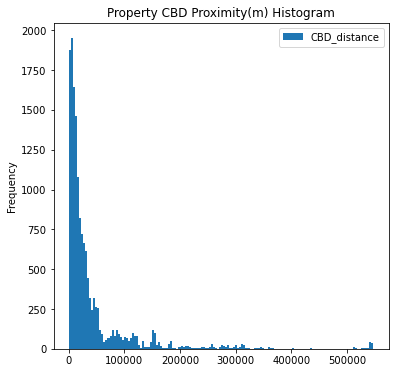

In [15]:
proximity_CBD = pd.read_csv("../data/raw/distance_to_CBD.csv", index_col=[0])
ax_CBD = proximity_CBD.plot.hist(bins=150, 
                                 column='CBD_distance', 
                                 figsize=(6,6), 
                                 title='Property CBD Proximity(m) Histogram',
                                 xlabel = 'Route Distance (m)',
                                 ylabel = 'Frequency')
plt.savefig("../plots/CBD_proximity_hist.jpeg")

2. School Proximity

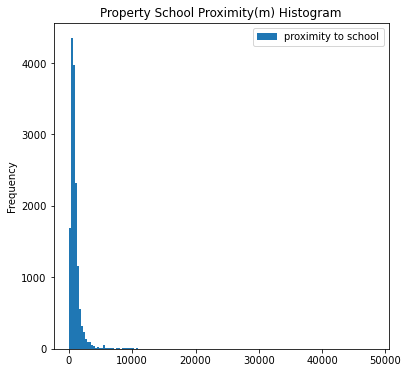

In [18]:
proximity_school = pd.read_csv("../data/raw/properties_shcool_proximity.csv", index_col=[0])
ax_school = proximity_school.plot.hist(bins=150, 
                                      column='proximity to school', 
                                      figsize=(6,6), 
                                      title='Property School Proximity(m) Histogram',
                                      xlabel = 'Route Distance (m)',
                                      ylabel = 'Frequency')
plt.savefig("../plots/school_proximity_hist.jpeg")

2. Train Station Proximity

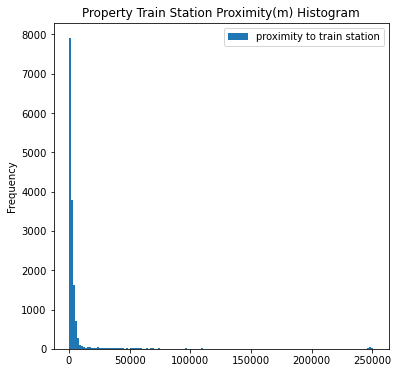

In [19]:
proximity_train= pd.read_csv("../data/raw/properties_train_proximity.csv", index_col=[0])
ax_train = proximity_train.plot.hist(bins=150, 
                                      column='proximity to train station', 
                                      figsize=(6,6), 
                                      title='Property Train Station Proximity(m) Histogram',
                                      xlabel = 'Route Distance (m)',
                                      ylabel = 'Frequency')
plt.savefig("../plots/train_proximity_hist.jpeg")

--------------
### Historical Income Data

In [ ]:
income_df = pd.read_csv('../data/raw/income_for_suburb.csv')
income_df = income_df.drop(columns='Unnamed: 0')
income_df.head()

In [ ]:
income_df_sample = income_df.sample(n=10, random_state=150)
income_df_sample = income_df_sample.set_index(keys='LOC_NAME', drop=True).transpose()
ax1 = income_df_sample.iloc[:8,:].plot(kind= 'line', title='A Sample Suburb Income', figsize=(20, 10)).legend(loc='upper left')
ax2 = income_df_sample.plot(kind= 'line', title='A Sample Suburb Prediction', figsize=(20, 10)).legend(loc='upper left')
ax1.set_title('Sample Suburbs')
ax2.set_title('Sample Suburbs')
ax1.get_figure().savefig("../plots/income_sample_1.jpeg")
ax2.get_figure().savefig("../plots/income_sample_2.jpeg")

------------
### Population and Preperty Count

In [ ]:
property1 = pd.read_csv("../data/raw/properties_preporcessed_1.csv", index_col=[0])[['name', 'SA2_MAIN16']]
population_sa2 = pd.read_csv("../data/raw/external_data/population.csv", index_col=[0])
population_sa2 = population_sa2[['SA2 code', 'SA2 name', 'ERP 2021','density 2021 persons/km2']]
property_agg = property1.groupby('SA2_MAIN16', as_index=False).count().rename(columns={'SA2_MAIN16' : 'SA2 code', 'name' : 'property_count'})

In [ ]:
pop_count = pd.merge(property_agg, population_sa2, on='SA2 code', how='left')
pop_count = pop_count[(np.abs(stats.zscore(pop_count['property_count'])) <2.5)]
pop_count = pop_count[(np.abs(stats.zscore(pop_count['ERP 2021'])) < 5)]

In [ ]:
ax3 = pop_count.plot(kind='scatter', title='Property Count and Population (SA2)', y='ERP 2021', x='property_count')
ax3.add_line(line=plt.Line2D(xdata=[0, 140], ydata=[7500, 30000], color='red'))
ax3.get_figure().savefig("../plots/population_property_scatter.jpeg")

In [ ]:
pop_count[['property_count', 'ERP 2021']].corr()